# Dollar Cost Averaging vs Lump Sum Purchases
> Visually observing which method produces better returns

- toc: false
- badges: false
- comments: true
- categories: [Finance]
- image: images/chart-preview.png


In [2]:
#hide
!pip install ta
!pip install pykalman
!pip install pandas-datareader
!pip install pandas
!pip install matplotlib
!pip install fast-ta
!pip install yfinance
!pip install mplfinance

# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install Ta-Lib
# import talib

!pip install ta
import ta 

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

# More Plotting libaries 
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# libraries for Data Download
import datetime
from pandas_datareader import data as pdr
import yfinance as yf

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=b4f821b477bd5bc12dcac1219e21039573eefa84ba9fd9aec0aa2a5f17b3d492
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta
     |████████████████████████████████| 235kB 7.8MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-cp37-none-any.whl size=48464 sha256=01dd74d195f4a9fd74d79d9bb44f29ec0229186f9be59cdbd04130cdeab9231b
  Stored in directory: /root/.cache/pip/wheels/d9/e8/6a/553d9832679cb74a8434fa597c3abdb07313e40054a0adf9ac
Successfully built pykalman
     |████████████████████████████████| 51kB 4.5MB/s 
  Created wheel for fast-ta: filename=fast_ta-0.1.3-cp37-cp37m-linux_x86_64.whl size=72757 sha256=0fbcf8eb2cf622c581ec34f817a218d73ca3d78295538df2fdc9a1b858de3c5d
  Stored in directory: /root/.cache/pip/wheels/42/3f/1f/f29387c19529e329312d20dd13fb8bc8cd7ad1d2f789427dad
Successfully built fast-ta
     |██████████████████████████

In [3]:
#hide
"""
Source for this :
https://github.com/eonofrey/DollarCostAverage_vs._LumpSum/blob/master/ls_dca_analysis.ipynb
"""

def lumpsum(invest_date, principal=10000): 
    invest_price = data.loc[invest_date]['Adj Close']
    current_price = data['Adj Close'][-1]
    
    investment_return = (current_price / invest_price) -1
    
    return principal*(1+investment_return)

def dollar_cost_average(invest_date, periods=12, freq='30D', principal=10000): 
    
    # Get DCA dates
    dca_dates =  investment_dates_all = pd.date_range(invest_date, periods=periods, freq=freq)
    
    # Filter out ones past the last data day
    dca_dates = dca_dates[dca_dates < data.index[-1]]
    
    # Figure out how many dates we cut off
    cut_off_count = 12 - len(dca_dates)

    # Amount you have in cash and not the market
    value = cut_off_count*(principal/periods)
    
    for date in dca_dates:
        # Get an actual trading day
        trading_date = data.index[data.index.searchsorted(date)]

        # Calculate lumpsum value if invested on that date, add to value
        value += lumpsum(trading_date, principal= principal/periods)
    
    return value

In [4]:
#hide
#@title PLOT
def plot_chart(data, n,m): # add i here for the gif script
    
    # Filter number of observations to plot
    data = data.iloc[n:m,:]
    
    # Create figure and set axes for subplots
    fig = plt.figure()
    fig.set_size_inches((20, 16))
    ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
    # ax_vol = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
    
    # Format x-axis ticks as dates
    ax_candle.xaxis_date()
    
    # Get nested list of date, open, high, low and close prices
    ohlc = []
    for date, row in data.iterrows():
        openp, highp, lowp, closep = row[:4]
        ohlc.append([date2num(date), openp, highp, lowp, closep])
 
    # Plot candlestick chart
    # ax_candle.plot(data.index, data["EMA50"], label="EMA50",c = '#4d00ff')
    # ax_candle.plot(data.index, data["EMA100"], label="EMA100",c = '#9001f0')
    # ax_candle.plot(data.index, data["EMA200"], label="EMA200",c = '#d102e8')
    # ax_candle.plot(data.index, data["EMA300"], label="EMA300",c = '#f101c2')
    # ax_candle.plot(data.index, data['VWAP'], label='Volume Weighted Average Price', c='#4d00ff', alpha = 0.7)
    ax_candle.plot(data.index, data["MA200"], label="MA200",c = '#e80030', alpha = 0.3)
    ax_candle.plot(data.index, data["MA5"], label="MA5",c = '#ff5400', alpha = 0.3)
    ax_candle.plot(data.index, data["MA10"], label="MA10",c = '#9e0059', alpha = 0.3)
    ax_candle.plot(data.index, data["MA50"], label="MA50",c = '#f101c2', alpha = 0.3)
    ax_candle.plot(data.index, data["upperband"], label = 'Upper BB', c= '#22223b', alpha = 0.7)
    ax_candle.plot(data.index, data["middleband"], label = 'Middle BB', c= '#4a4e69',linestyle='--')
    ax_candle.plot(data.index, data["lowerband"], label = 'Lower BB', c= '#22223b', alpha = 0.7)
    ax_candle.fill_between(data.index, data["upperband"], data["lowerband"], color= '#22223b', alpha = 0.05)
    candlestick_ohlc(ax_candle, ohlc, colorup="#00f5d4", colordown="#ef233c", width=0.8)
    ax_candle.plot(data.index, data['Buy_Signal'], '^', markersize=10, color='#59cd90')
    ax_candle.plot(data.index, data['Sell_Signal'], 'v', markersize=10, color='#960018')
    ax_candle.set_ylabel(f"{tick} Daily Candle Stick")
    ax_candle.legend()
    
    # Plot MACD
    ax_macd.plot(data.index, data["macd"], label="MACD", c = '#22223b')
    ax_macd.plot(data.index, data["macd_EMA50"], label="MACD EMA 50", c = '#22223b', alpha = 0.7)
    ax_macd.bar(data.index, data["macd_hist"] * 3, label="hist", color = '#22223b', alpha = 0.7)
    ax_macd.plot(data.index, data["macd_signal"], label="signal", c = '#ef233c')
    ax_macd.fill_between(data.index, data["macd"], data["macd_EMA50"], where=(data["macd"] > data["macd_EMA50"]), color= '#00f5d4', alpha = 0.05)
    ax_macd.fill_between(data.index, data["macd_signal"], data["macd_EMA50"], where=(data["macd_signal"] > data["macd_EMA50"]) ,color= '#00f5d4', alpha = 0.05)
    ax_macd.fill_between(data.index, data["macd"], data["macd_EMA50"], where=(data["macd"] < data["macd_EMA50"]), color= '#ef233c', alpha = 0.05)
    ax_macd.fill_between(data.index, data["macd_signal"], data["macd_EMA50"], where=(data["macd_signal"] < data["macd_EMA50"]) ,color= '#ef233c', alpha = 0.05)
    ax_macd.plot(data.index, data['macd_buy_signal'], '^', markersize=10, color='#59cd90')
    ax_macd.plot(data.index, data['macd_sell_signal'], 'v', markersize=10, color='#960018')
    ax_macd.set_ylabel("Moving Average Convergence Divergence")
    ax_macd.legend()


    # Volume on same axis
    # ax_vol.bar(data.index, data["Volume"] / 1000000, color = '#22223b', alpha = 0.35)
    # ax_vol.set_ylabel("Volume Millions")
    # ax_vol.grid(False)

    # To save save the chart as PNG  
    # fig.savefig(str(ticker) + str(i) + ".png", bbox_inches="tight")
    # from google.colab import files
    # files.download( str(ticker) + str(i) + ".png" )  
    
    plt.show()

In [5]:
#hide
#@title GET 
def get_indicators(data):
    # Get MACD
    data["macd"], data["macd_signal"], data["macd_hist"] = talib.MACD(data['Close'])
    # ema10 works well for crypto
    # data['macd_signal'] = data['macd_signal'].ewm(span=10).mean()
    data['macd_EMA50'] = data['macd'].ewm(span=50).mean()
    # data['macd_hist'] = data['macd_hist'].ewm(span=10).mean()
    data['macd_signal_s1'] = data['macd_signal'].shift(1)
    data['macd_s1'] = data['macd'].shift(1)
    data['macd_hist_s1'] = data['macd_hist'].shift(1)
    data['macd_hist_s2'] = data['macd_hist'].shift(2)
    data['macd_hist_s3'] = data['macd_hist'].shift(3)
    
    # Get EMAs and MAs
    data['EMA9'] = data['Close'].ewm(span=9).mean()
    data['EMA9_s1'] = data['EMA9'].shift(1)
    data['EMA5'] = data['Close'].ewm(span=5).mean()
    data['EMA10'] = data['Close'].ewm(span=10).mean()
    data['EMA50'] = data['Close'].ewm(span=50).mean()
    data['EMA50_s1'] = data['EMA50'].shift(1)
    data['EMA200'] = data['Close'].ewm(span=200).mean()
    data['EMA300'] = data['Close'].ewm(span=300).mean()

    data['MA200'] = data['Close'].rolling(window=200).mean()
    data['MA5'] = data['Close'].rolling(window=5).mean()
    data['MA5_s1'] = data['MA5'].shift(1)
    data['MA10'] = data['Close'].rolling(window=10).mean()
    data['MA300'] = data['Close'].rolling(window=300).mean()
    data['MA10_s1'] = data['MA10'].shift(1)
    data['MA50'] = data['Close'].rolling(window=50).mean()
    # BB
    data["upperband"], data["middleband"], data["lowerband"] = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)


    # Volume
    data['Volume_s1'] = data['Volume'].shift(1)
    data['Volume_pct'] = data['Volume'].apply(np.log).pct_change().ewm(span=50).mean() # percentage change
    data['Volume_pct_s1'] = data['Volume_pct'].shift(1) 

    # Previous Candle
    data['High_s1'] = data['High'].shift(1)
    data['Low_s1'] = data['Low'].shift(1)
    data['Open_s1'] = data['Open'].shift(1)
    data['Close_s1'] = data['Close'].shift(1)

    data['High_s2'] = data['High'].shift(2)
    data['Low_s2'] = data['Low'].shift(2)
    data['Open_s2'] = data['Open'].shift(2)
    data['Close_s2'] = data['Close'].shift(2)

    return data

The idea behind this notebook is to showcase two strategies of investing into an asset. As an example we'll invest 10,000 AUD into the ASX top 200 (ASX:IOZ), the NASDAQ 100 (ASX:NDQ), Bitcoin and Ethereum. In the below diagram of ASX:IOZ, the first plot shows the price of IOZ over the past 4 years. The plot below shows the lump sum return on investment in blue. As an example, if you had invested 10,000 AUD on 01-01-2021 you would currently have ~11000 AUD today if you had made a lump sum purchase. The red line shows the return on investment if you had purchased 833.33 AUD every 30 days until you spent your 10,000 AUD capital. As an example, if you had invested your first 833.33 AUD on 01-01-2021, you would have ~10,400 AUD today. 

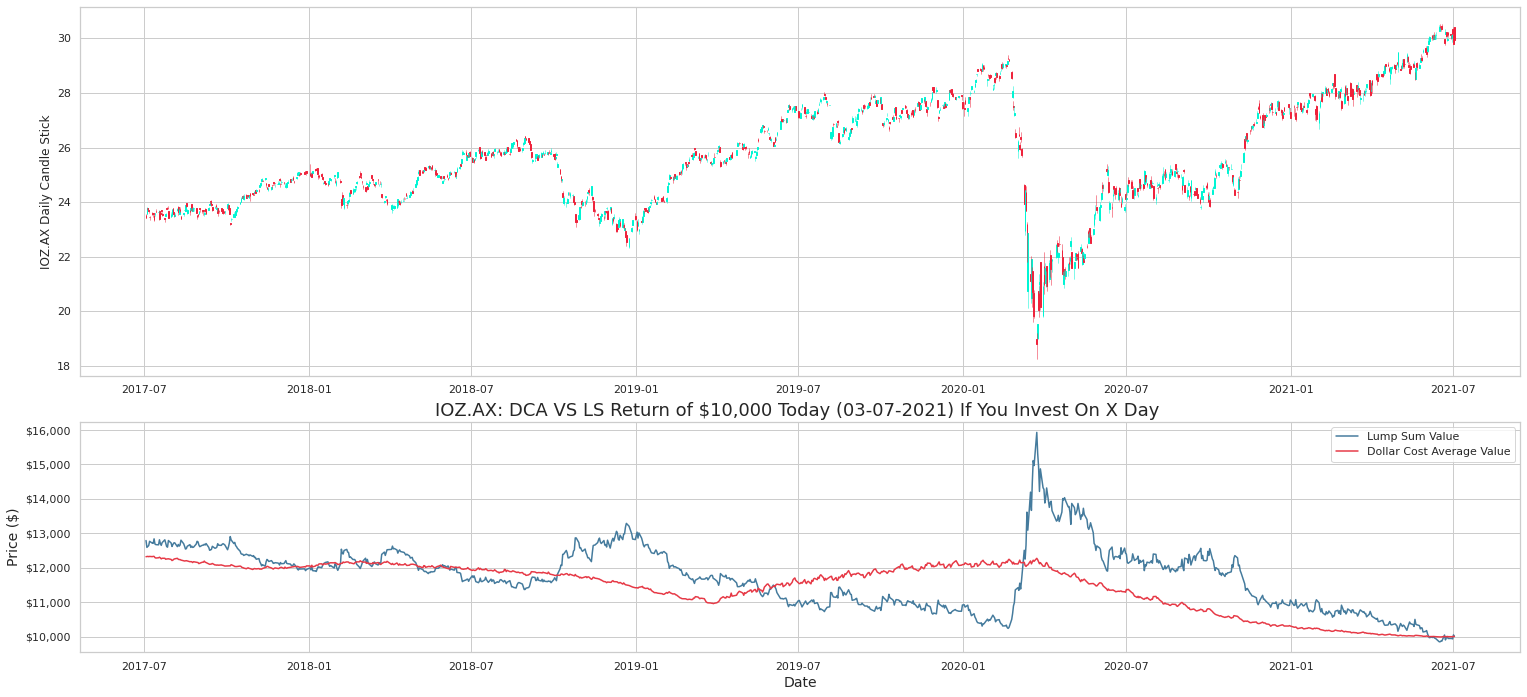

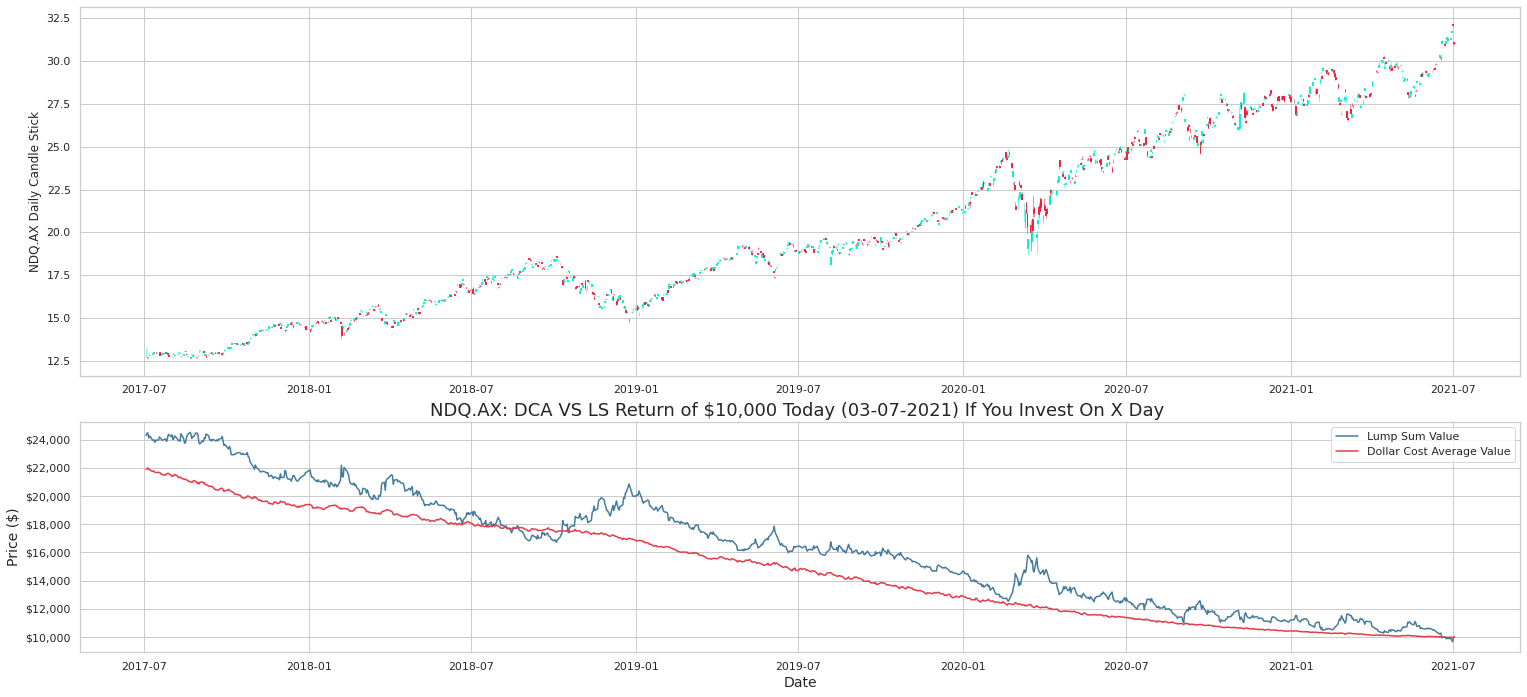

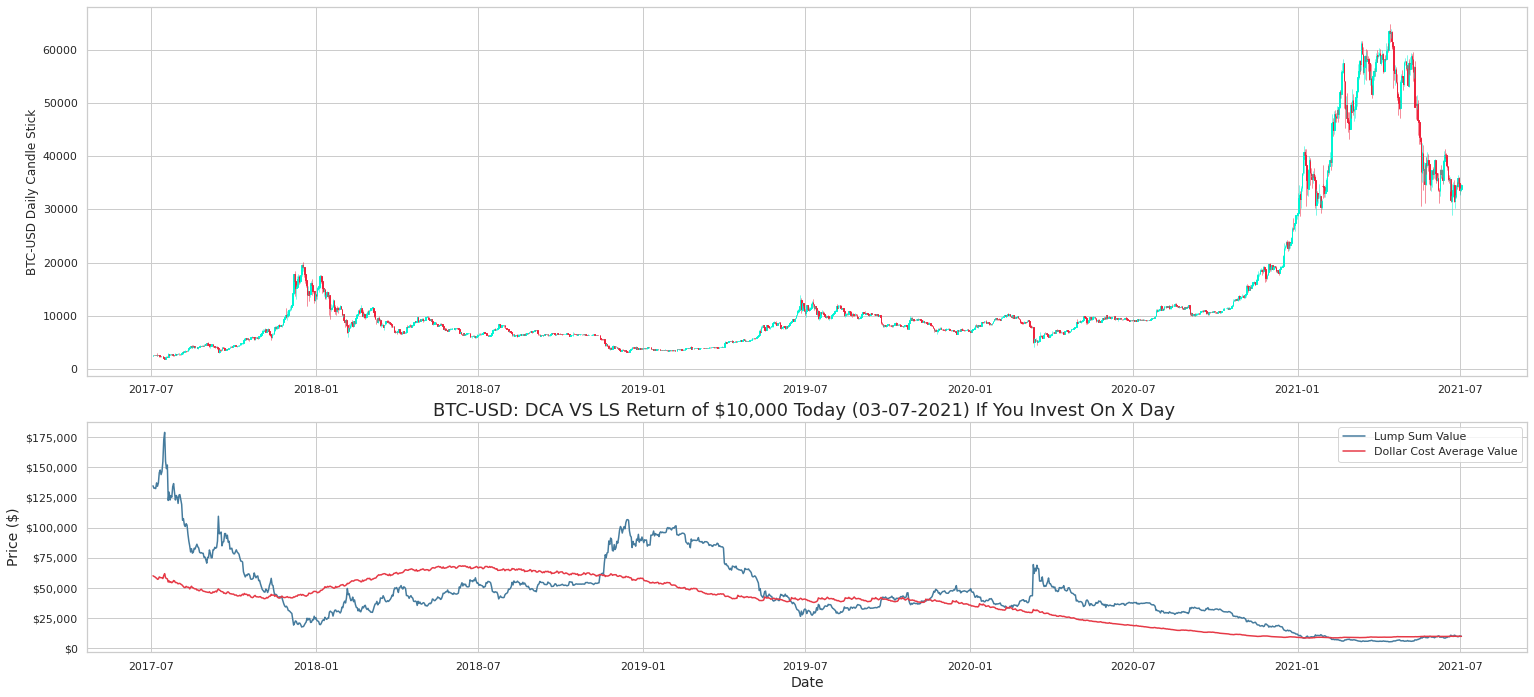

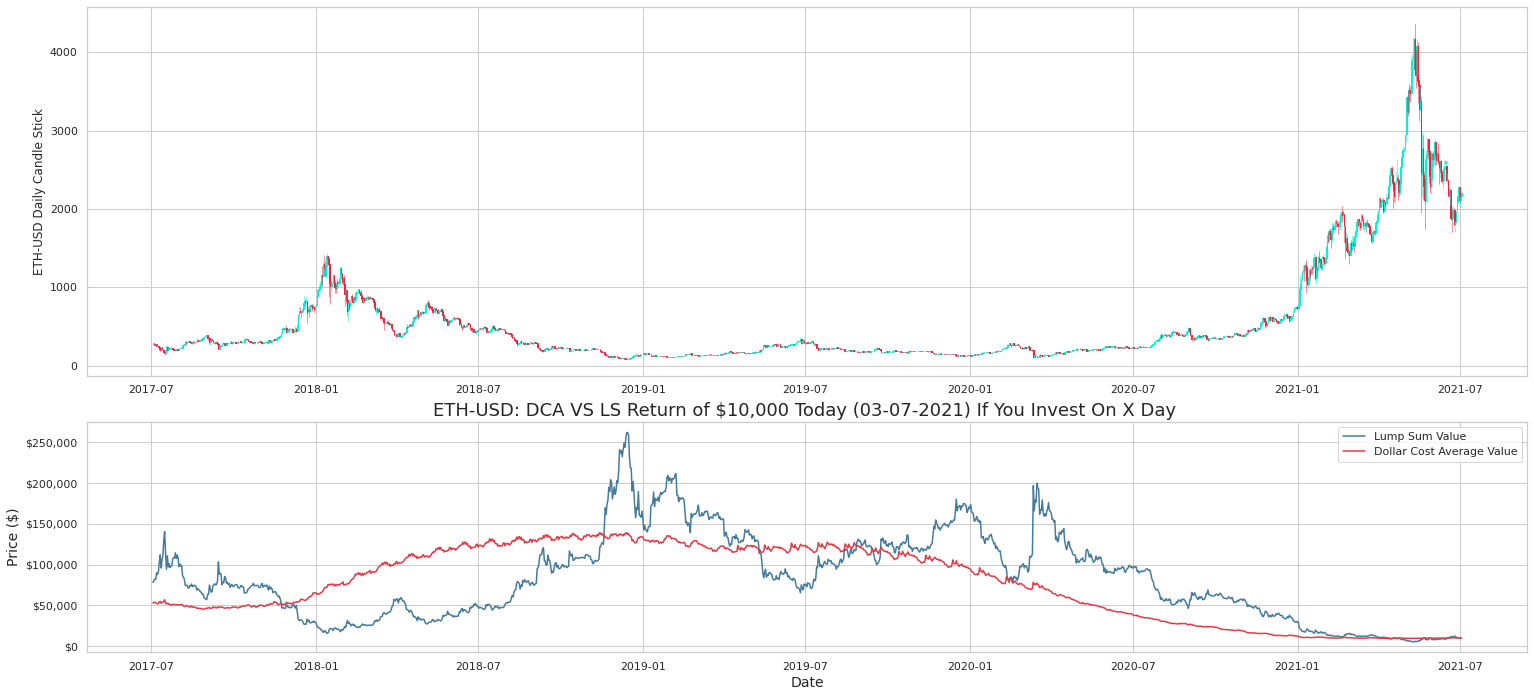

In [6]:
#hide_input
#@title dca vs ls 
import matplotlib.ticker as ticker


# ticks = [ '^GSPC', '^DJI', '^IXIC', '^AXJO']
# ticks = [ 'NDQ.AX','ASIA.AX','ETHI.AX']
# COMMSEC ETF TICKS
# ticks = ['IOZ.AX', 'NDQ.AX', 'IOO.AX', 'IEM.AX', 'SYI.AX', 'IXJ.AX','ETHI.AX', 'ASIA.AX', 'RBTZ.AX', 'HACK.AX' ]
ticks = ['IOZ.AX', 'NDQ.AX','BTC-USD','ETH-USD']
# MAKING DATAFRAME
yf.pdr_override() 
for tickax in ticks: 

  data = pdr.get_data_yahoo(tickax, interval = '1d', period = '4y',progress=False)
  spy_price = data['Adj Close']
  # data = get_indicators(data)

  # Style and size
  sns.set_style("whitegrid")
  
  fig = plt.figure()
  fig.set_size_inches((20, 16))
  ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
  ax_strat = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
  # ax_vol = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)

  # Format x-axis ticks as dates
  ax_candle.xaxis_date()

  # Get nested list of date, open, high, low and close prices
  ohlc = []
  for date, row in data.iterrows():
    openp, highp, lowp, closep = row[:4]
    ohlc.append([date2num(date), openp, highp, lowp, closep])

  # Plot candlestick chart
  # ax_candle.plot(data.index, data["MA200"], label="MA200",c = '#e80030', alpha = 0.3)
  # ax_candle.plot(data.index, data["MA5"], label="MA5",c = '#ff5400', alpha = 0.3)
  # ax_candle.plot(data.index, data["MA10"], label="MA10",c = '#9e0059', alpha = 0.3)
  # ax_candle.plot(data.index, data["MA50"], label="MA50",c = '#f101c2', alpha = 0.3)
  # ax_candle.plot(data.index, data["upperband"], label = 'Upper BB', c= '#22223b', alpha = 0.7)
  # ax_candle.plot(data.index, data["middleband"], label = 'Middle BB', c= '#4a4e69',linestyle='--')
  # ax_candle.plot(data.index, data["lowerband"], label = 'Lower BB', c= '#22223b', alpha = 0.7)
  # ax_candle.fill_between(data.index, data["upperband"], data["lowerband"], color= '#22223b', alpha = 0.05)
  candlestick_ohlc(ax_candle, ohlc, colorup="#00f5d4", colordown="#ef233c", width=0.8)
  ax_candle.set_ylabel(f"{tickax} Daily Candle Stick")
  # ax_candle.legend()
  pr = 10000
  lump_sum = [lumpsum(x, principal=pr) for x in data.index]
  p = 12
  fr = '30D'
  dca = [dollar_cost_average(i, periods=p, freq=fr, principal=pr) for i in data.index]

  # fig, ax = plt.subplots()


  # fig.set_size_inches(19, 10)

  # Plot Series
  # ax.plot(data.index, spy_price, color='black')
  ax_strat.plot(data.index, lump_sum, color='#457b9d')
  ax_strat.plot(data.index, dca, color='#e63946')

  # Set Y axis format 
  tick = ticker.StrMethodFormatter('${x:,.0f}')
  ax_strat.yaxis.set_major_formatter(tick) 
  ax_strat.set_title(f'{tickax}: DCA VS LS Return of $10,000 Today ({date.today():%d-%m-%Y}) If You Invest On X Day ', size=18)
  ax_strat.set_ylabel('Price ($)', size=14)
  ax_strat.set_xlabel('Date', size=14)
  # txt = f' LS: You invest {pr} on X day \n DCA: Investing {pr/p:.2f} every {fr}, {p} times'
  # fig.text(0.1, 0.05, txt)

  ax_strat.legend(['Lump Sum Value', 'Dollar Cost Average Value'])
  plt.show()

In [ ]:
#hide
def buy_conditions(s):

    # MACD
    if (s['Close_s1'] < s['MA50']) and (s['Close'] > s['MA50']) and (s['Close'] < s['MA200']): 
      return s['Close']

    else:
        return None # Do Nothing


def sell_conditions(s):

    if (s['macd_hist'] > 0) and (s['macd_hist_s3'] > s['macd_hist_s2'] > s['macd_hist_s1'] > s['macd_hist']) and (s['Close'] > s['MA200']): 
      return s['Close']


    else:
        return None # Do Nothing


def macd_buy_signal(s):
    if (s['macd_signal_s1'] > s['macd_s1']) and (s['macd'] > s['macd_signal']): 
      return s['macd']
    else:
        return None # Do Nothing

def macd_sell_signal(s):
    if (s['macd_signal_s1'] < s['macd_s1']) and (s['macd'] < s['macd_signal']): 
      return s['macd']
    else:
        return None # Do Nothing


[*********************100%***********************]  1 of 1 completed
********************* ^GSPC *********************


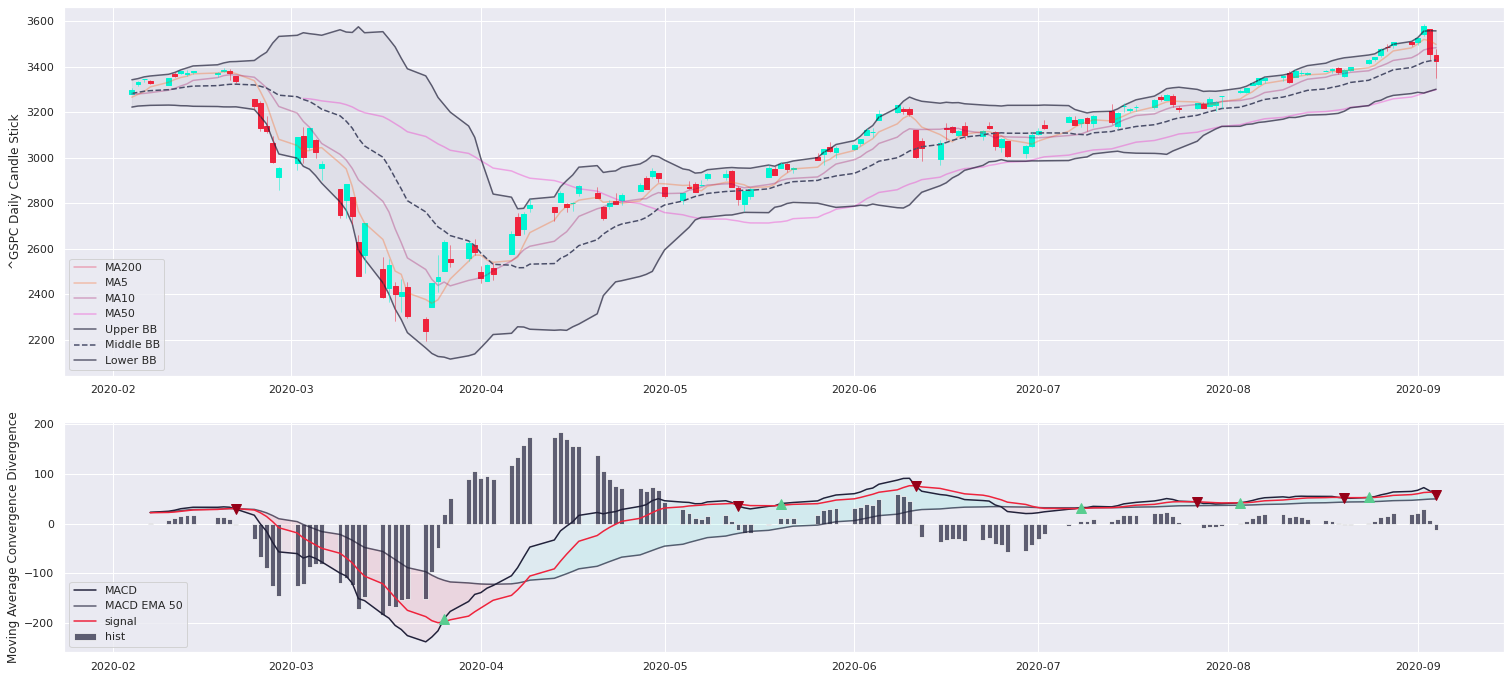

[*********************100%***********************]  1 of 1 completed
********************* ^DJI *********************


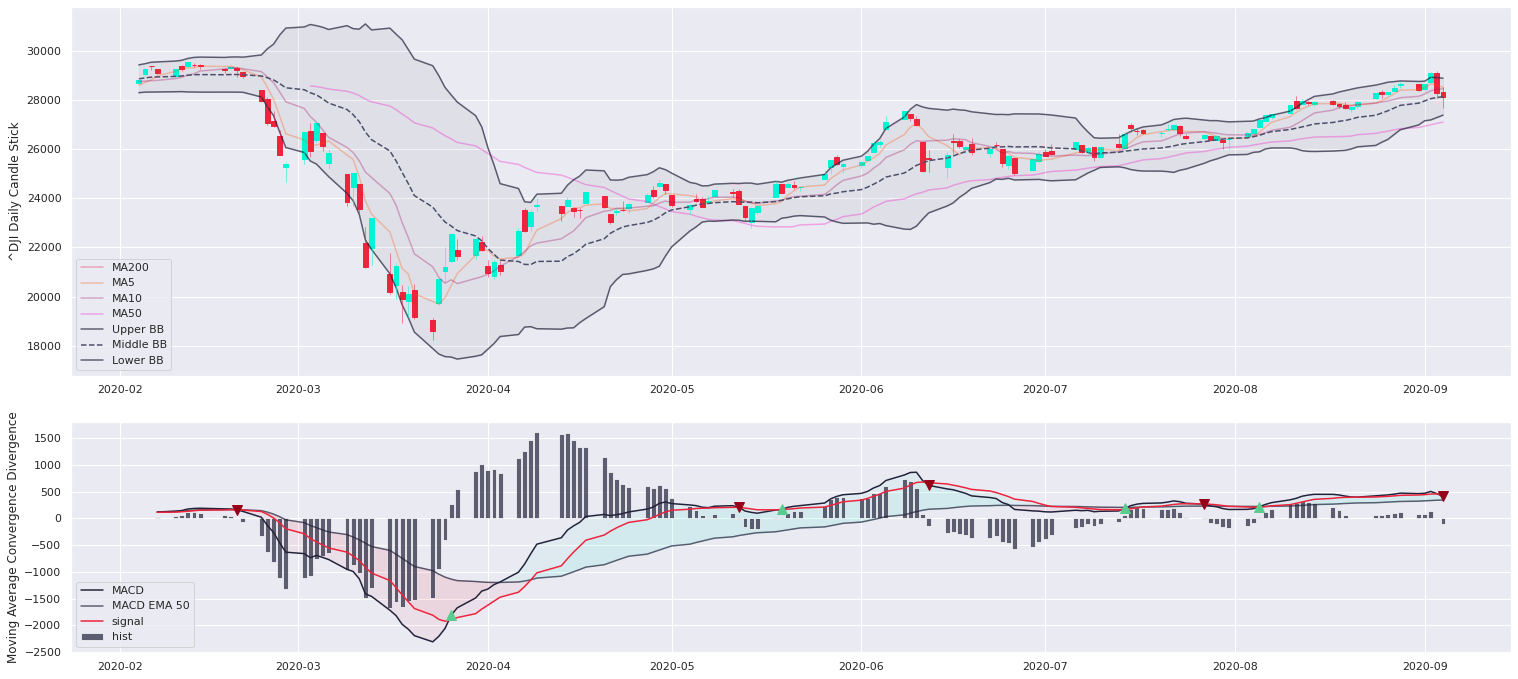

[*********************100%***********************]  1 of 1 completed
********************* ^IXIC *********************


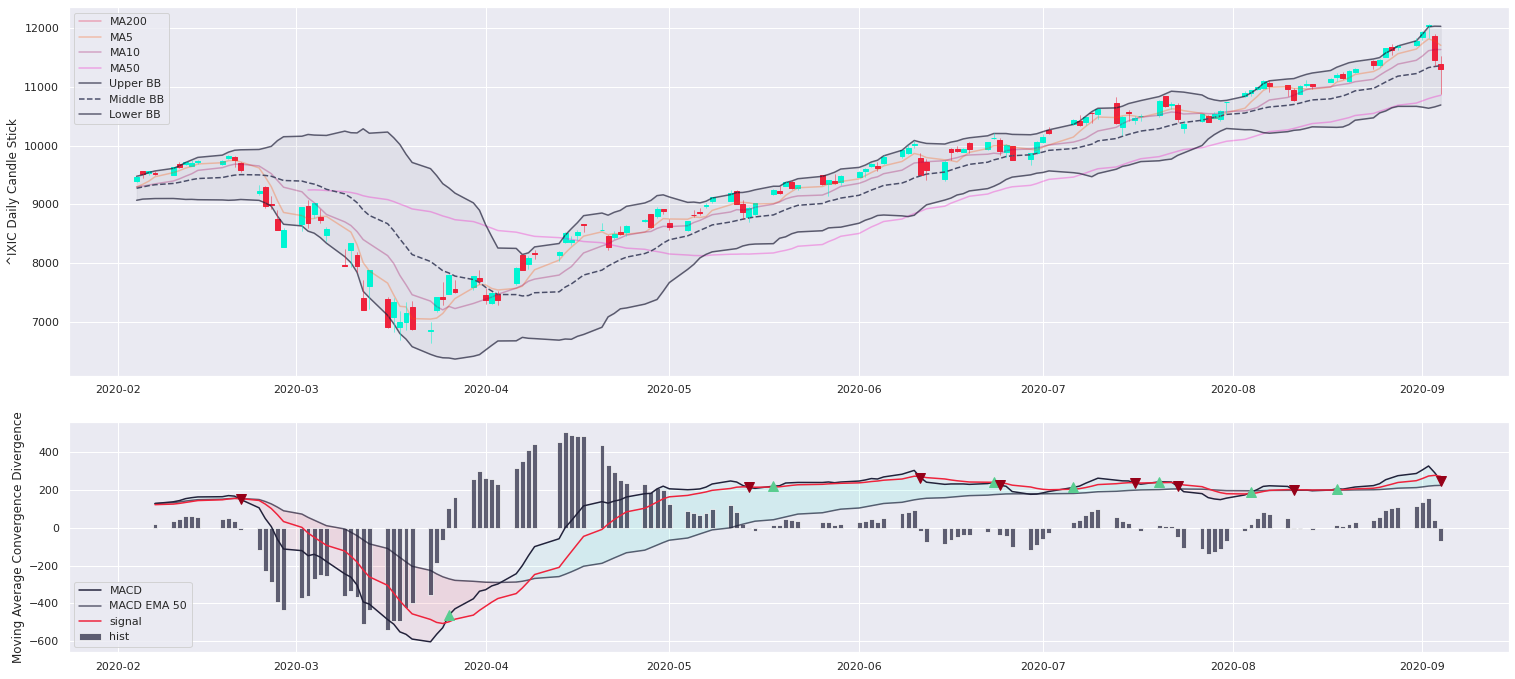

[*********************100%***********************]  1 of 1 completed
********************* ^AXJO *********************


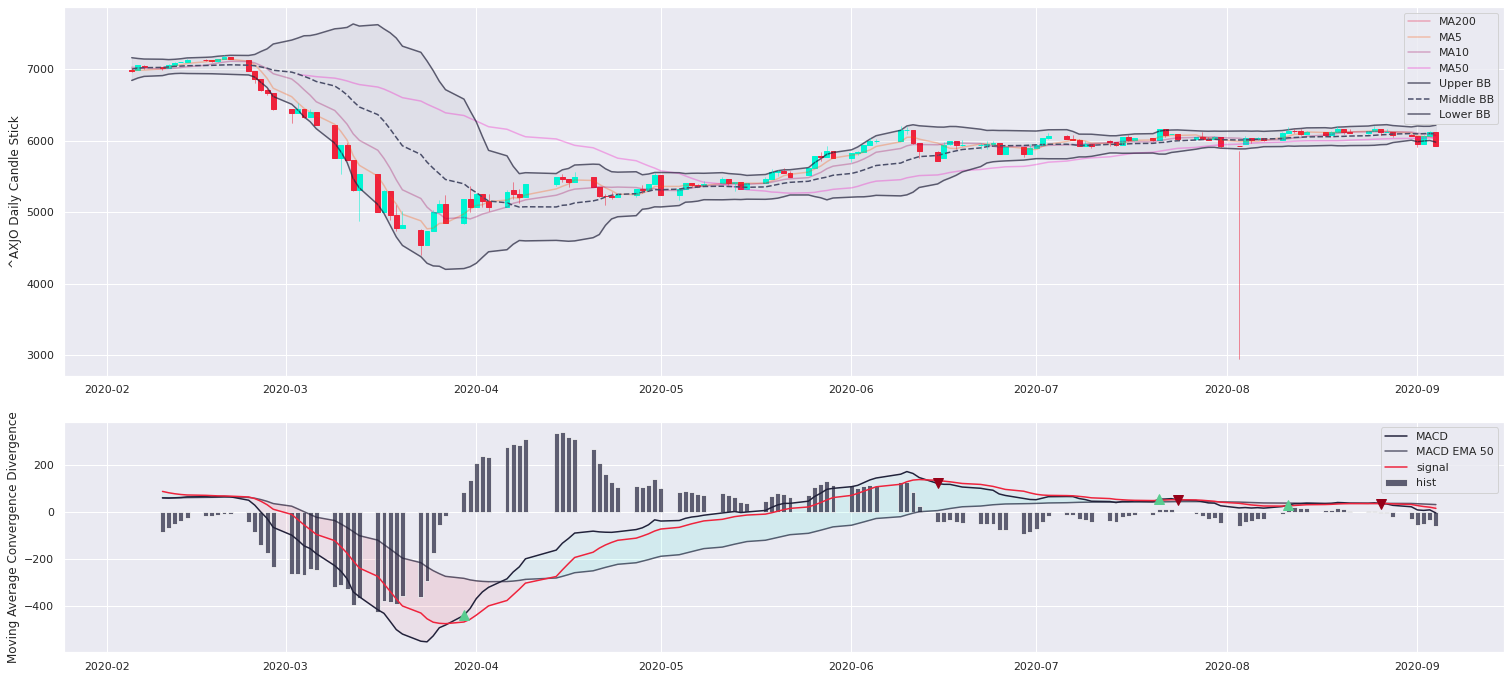

In [ ]:
#hide
# ticks = ['BTC-AUD','LTC-BTC', 'ETH-BTC', 'BCH-BTC', 'XRP-BTC']
# ticks = ['ETH-BTC','LINK-BTC','BNB-BTC','XRP-BTC',
#          'ADA-BTC','BCH-BTC','EOS-BTC','VET-BTC','BAT-BTC',
#          'LTC-BTC','ZEC-BTC','TRX-BTC','XMR-BTC','XLM-BTC',
#          'NEO-BTC','ETC-BTC','ZRX-BTC','BNT-BTC','KNC-BTC',
#          'QTUM-BTC','RLC-BTC','DASH-BTC','LRC-BTC','XVG-BTC',
#          'DGB-BTC','SC-BTC','FUN-BTC','MIOTA-BTC','ICX-BTC',
#          'NANO-BTC','MCO-BTC','KMD-BTC','ARDR-BTC','REP-BTC',
#          'STRAT-BTC','ARK-BTC','BTS-BTC','WAVES-BTC',
#          'MTL-BTC','WTC-BTC','CVC-BTC','XEM-BTC','XZC-BTC']

# ticks = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'BCH-USD', 'XRP-USD', 'EOS-USD']
# ticks = ['BTC-AUD']
# ticks = ['ETH-BTC','LINK-BTC','BNB-BTC','XRP-BTC']
# ticks = ['APT.AX','Z1P.AX','AMD', 'INTC', 'NFLX', 'TSLA']

# BIG BOYS
# ticks = ['AAPL', 'FB', 'MSFT', 'AMZN', 'AMD', 'INTC', 'NFLX', 'TSLA']
# ticks = ['SPY']
ticks = [ '^GSPC', '^DJI', '^IXIC', '^AXJO']

# COMMSEC ETF TICKS
# ticks = ['IOZ.AX', 'NDQ.AX', 'IOO.AX', 'IEM.AX', 'SYI.AX', 'IXJ.AX','ETHI.AX', 'ASIA.AX', 'RBTZ.AX', 'HACK.AX' ]

# MAKING DATAFRAME
yf.pdr_override() 
for tick in ticks: 
  data = pdr.get_data_yahoo(tick, interval = '1d', period = "180d")
  print('*********************',tick,'*********************')      
  data = get_indicators(data)
  data['macd_buy_signal'] = data.apply(macd_buy_signal, axis=1)
  data['macd_sell_signal'] = data.apply(macd_sell_signal, axis=1)
  data['Buy_Signal'] = data.apply(buy_conditions, axis=1)
  data['Sell_Signal'] = data.apply(sell_conditions, axis=1)
  # I recommend the time frame looked at is approx ~250 days or less to best visualise the the markers (60 days for stocks)
  plot_chart(data, 30,len(data)) # data,min_date_len, max_date_len, tick   len(data)-250

In [ ]:
#hide
def trade_env(data, tick, print_ = True):
  CAPITAL = 100 # units
  COMMISSION = 0.01
  units = 0

  def neat_date(x):
    return str(x).replace("00:00:00","")

  for i in range(len(data)):

    if (data.Buy_Signal[i] > 0) and (CAPITAL > 0) and (data.Buy_Signal[i] < data.middleband[i]): # Buy 20 when under the middleband 
      units = units + (20/data.Buy_Signal[i])*(1-COMMISSION) # How much to buy - commisson
      CAPITAL = CAPITAL - 20
      # if (print_ == True):
      #   print(f'{neat_date(data.index[i])} : BUY {20/data.Buy_Signal[i]} at {data.Buy_Signal[i]}')

    if (data.Buy_Signal[i] > 0) and (CAPITAL > 0) and (data.Buy_Signal[i] > data.middleband[i]): # Buy 10 when over the middleband 
      units = units + (10/data.Buy_Signal[i])*(1-COMMISSION) # How much to buy - commisson
      CAPITAL = CAPITAL - 10
      # if (print_ == True):
      #   print(f'{neat_date(data.index[i])} : BUY {10/data.Buy_Signal[i]} at {data.Buy_Signal[i]}')


    if (units > 0):
      if (data.Sell_Signal[i] > 0): # Sell
        sell_units = 10/data.Sell_Signal[i]
        CAPITAL = CAPITAL + ((data.Sell_Signal[i]*(sell_units))*(1-COMMISSION)) # sellign 50 percent everytime - commisson
        # if (print_ == True):
        #   print(f'{neat_date(data.index[i])} : SELL {units} at {data.Sell_Signal[i]}')
        units = units-sell_units

    if (i == (data.shape[0]-1)): # Print portfolio value of last day
      portfolio_val = (units*data.Close[i]) + CAPITAL # Current portfolio value
      print(f'{neat_date(data.index[i])} : APPROX {tick} PORTFOLIO VALUE {portfolio_val}')
    
  return portfolio_val
ticks = ['ETH-BTC','LINK-BTC','BNB-BTC',
         'ADA-BTC','BCH-BTC','EOS-BTC','VET-BTC','BAT-BTC',
         'LTC-BTC','ZEC-BTC','TRX-BTC','XMR-BTC','XLM-BTC',
         'NEO-BTC','ETC-BTC','ZRX-BTC','BNT-BTC','KNC-BTC',
         'QTUM-BTC','RLC-BTC','DASH-BTC','LRC-BTC','XVG-BTC',
         'DGB-BTC','SC-BTC','FUN-BTC','MIOTA-BTC','ICX-BTC',
         'NANO-BTC','MCO-BTC','KMD-BTC','ARDR-BTC','REP-BTC',
         'STRAT-BTC','ARK-BTC','BTS-BTC','WAVES-BTC',
         'MTL-BTC','CVC-BTC','XEM-BTC','XZC-BTC']
# ticks = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'BCH-USD', 'XRP-USD', 'EOS-USD']
# ticks = ['AAPL', 'FB', 'MSFT', 'AMZN', 'AMD', 'INTC', 'NFLX', 'TSLA']
portval = []
for tick in ticks: 
  data = pdr.get_data_yahoo(tick, interval = '1d', period = "2y")
  print('*********************',tick,'*********************')      
  data = get_indicators(data)
  data = patterns(data)
  data['Buy_Signal'] = data.apply(buy_conditions, axis=1)
  data['Sell_Signal'] = data.apply(sell_conditions, axis=1)
  val = trade_env(data,tick)
  portval.append(val)

  """
  """

[*********************100%***********************]  1 of 1 completed
********************* ETH-BTC *********************
2020-07-14  : APPROX ETH-BTC PORTFOLIO VALUE 100.43261866569937
[*********************100%***********************]  1 of 1 completed
********************* LINK-BTC *********************
2020-07-14  : APPROX LINK-BTC PORTFOLIO VALUE 397.50809737837176
[*********************100%***********************]  1 of 1 completed
********************* BNB-BTC *********************
2020-07-14  : APPROX BNB-BTC PORTFOLIO VALUE 188.15193087003362
[*********************100%***********************]  1 of 1 completed
********************* ADA-BTC *********************
2020-07-14  : APPROX ADA-BTC PORTFOLIO VALUE 156.304601760514
[*********************100%***********************]  1 of 1 completed
********************* BCH-BTC *********************
2020-07-14  : APPROX BCH-BTC PORTFOLIO VALUE 80.26334414045805
[*********************100%***********************]  1 of 1 completed
*******

In [ ]:
#hide
def Average(lst): 
    return sum(lst) / len(lst) 
Average(portval)

89.52103672292822

In [ ]:
#hide
# # ticks = ['BTC-AUD','LTC-BTC', 'ETH-BTC', 'BCH-BTC', 'XRP-BTC']
# # ticks = ['ETH-BTC','LINK-BTC','BNB-BTC','XRP-BTC',
# #          'ADA-BTC','BCH-BTC','EOS-BTC','VET-BTC','BAT-BTC',
# #          'LTC-BTC','ZEC-BTC','TRX-BTC','XMR-BTC','XLM-BTC',
# #          'NEO-BTC','ETC-BTC','ZRX-BTC','BNT-BTC','KNC-BTC',
# #          'QTUM-BTC','RLC-BTC','DASH-BTC','LRC-BTC','XVG-BTC',
# #          'DGB-BTC','SC-BTC','FUN-BTC','MIOTA-BTC','ICX-BTC',
# #          'NANO-BTC','MCO-BTC','KMD-BTC','ARDR-BTC','REP-BTC',
# #          'STRAT-BTC','ARK-BTC','BTS-BTC','WAVES-BTC',
# #          'MTL-BTC','WTC-BTC','CVC-BTC','XEM-BTC','XZC-BTC']

# ticks = ['ETH-USD']
# # ticks = ['BTC-USD']
# # ticks = ['APT.AX','Z1P.AX','AMD', 'INTC', 'NFLX', 'TSLA']

# # BIG BOYS
# # ticks = ['AAPL', 'FB', 'MSFT', 'AMZN', 'AMD', 'INTC', 'NFLX', 'TSLA']
# ticks = ['INTC']

# # ticks = [ '^GSPC', '^DJI', '^IXIC', '^AXJO']

# # MAKING DATAFRAME
# yf.pdr_override() 
# for tick in ticks: 
#   data = pdr.get_data_yahoo(tick, interval = '1d', period = "4y")
#   print('*********************',tick,'*********************')      
#   data = get_indicators(data)
#   data['macd_buy_signal'] = data.apply(macd_buy_signal, axis=1)
#   data['macd_sell_signal'] = data.apply(macd_sell_signal, axis=1)
#   # data['CCI_buy_signal'] = data.apply(cci_buy_signal, axis=1)
#   # data['CCI_sell_signal'] = data.apply(cci_sell_signal, axis=1)
#   data['MFI_buy_signal'] = data.apply(MFI_buy_signal, axis=1)
#   data['MFI_sell_signal'] = data.apply(MFI_sell_signal, axis=1)
#   data['RSI_buy_signal'] = data.apply(rsi_buy_signal, axis=1)
#   data['RSI_sell_signal'] = data.apply(rsi_sell_signal, axis=1)
#   # data = patterns(data)
#   data['Buy_Signal'] = data.apply(buy_conditions, axis=1)
#   data['Sell_Signal'] = data.apply(sell_conditions, axis=1)
#   # I recommend the time frame looked at is approx ~250 days or less to best visualise the the markers (60 days for stocks)
#   for i in np.arange(560,700,14): #1080
#     plot_chart(data, 300 + i,480+i,i, tick) # data,min_date_len, max_date_len, tick   len(data)-250

In [ ]:
#hide
ticks = [ '^GSPC', '^DJI', '^IXIC', '^AXJO']
# ticks = [ 'NDQ.AX','ASIA.AX','ETHI.AX']
# COMMSEC ETF TICKS
# ticks = ['IOZ.AX', 'NDQ.AX', 'IOO.AX', 'IEM.AX', 'SYI.AX', 'IXJ.AX','ETHI.AX', 'ASIA.AX', 'RBTZ.AX', 'HACK.AX' ]
# ticks = ['Z1P.AX']
# MAKING DATAFRAME
yf.pdr_override() 
# for tickax in ticks: 

data = pdr.get_data_yahoo(ticks[2], interval = '60m', period = "1y")

[*********************100%***********************]  1 of 1 completed


In [ ]:
#hide
from pandas.api.types import CategoricalDtype

data['datetime']  = data.index
data['datetime'] = pd.to_datetime(data['datetime'] , format='%Y-%m-%d %H:%M:%S-05:00')
data["day_of_week"] = data["datetime"].dt.day_name()
data["month"] = data["datetime"].dt.month_name()
data["time"] = data['datetime'].dt.time #strftime('%H:%M')

data['Close_s1'] = data['Close'].shift(1)
data['Change_Close'] = ((data['Close_s1'] - data['Close'])/data['Close_s1'])

data['Volume_s1'] = data['Volume'].shift(1)
data['Change_Volume'] = ((data['Volume_s1'] - data['Volume'])/data['Volume_s1'])

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
data['day_of_week'] = data['day_of_week'].astype(cat_type)

df = data.groupby(['day_of_week', 'time']).mean()
df

Open          High  ...     Volume_s1  Change_Volume
day_of_week time                                  ...                             
Monday      09:30:00  10489.935537  10548.611039  ...  3.205251e+08           -inf
            10:30:00  10508.158223  10542.971032  ...  1.425283e+08           -inf
            11:30:00  10509.880959  10541.320043  ...  5.929318e+08           -inf
            12:30:00  10517.590731  10545.694456  ...  4.607665e+08       0.171314
            13:00:00           NaN           NaN  ...           NaN            NaN
            13:30:00  10520.881796  10542.629913  ...  3.559575e+08           -inf
            14:30:00  10516.756358  10546.154387  ...  3.217919e+08           -inf
            15:30:00  10517.284528  10549.118124  ...  4.002787e+08           -inf
Tuesday     09:30:00  10535.375817  10581.478027  ...  3.510827e+08           -inf
            10:30:00  10535.648719  10569.358962  ...  5.242722e+08           -inf
            11:30:00  10530.947425  10564.553767  ...  5.775466e+08       0.256419
            12:30:00  10540.295222  10565.649151  ...  4.261659e+08       0.141490
            13:00:00           NaN           NaN  ...           NaN            NaN
            13:30:00  10544.332041  10570.865018  ...  3.588216e+08           -inf
            14:30:00  10543.487492  10569.107366  ...  3.269208e+08           -inf
            15:30:00  10533.981042  10558.132822  ...  3.937914e+08           -inf
Wednesday   09:30:00  10549.507474  10599.584031  ...  3.496521e+08           -inf
            10:30:00  10562.397827  10589.932843  ...  4.796902e+08           -inf
            11:30:00  10559.178251  10586.736779  ...  6.022339e+08           -inf
            12:30:00  10563.264592  10586.007465  ...  4.486860e+08           -inf
            13:00:00           NaN           NaN  ...           NaN            NaN
            13:30:00  10560.720374  10584.609732  ...  3.584147e+08           -inf
            14:30:00  10558.478450  10585.084229  ...  3.679088e+08           -inf
            15:30:00  10553.233849  10581.743333  ...  3.931094e+08           -inf
Thursday    09:30:00  10498.714317  10558.625297  ...  3.476979e+08           -inf
            10:30:00  10521.689128  10561.730316  ...  5.692046e+08           -inf
            11:30:00  10526.070992  10552.412808  ...  5.737360e+08           -inf
            12:30:00  10469.887344  10502.598018  ...  4.625560e+08       0.158236
            13:00:00  12787.931641  12805.546875  ...  5.527213e+08       0.235496
            13:30:00  10475.803564  10500.479385  ...  3.688868e+08           -inf
            14:30:00  10468.815518  10496.433916  ...  3.458124e+08           -inf
            15:30:00  10462.089687  10492.534541  ...  3.973156e+08           -inf
Friday      09:30:00  10499.226288  10539.845571  ...  3.035134e+08           -inf
            10:30:00  10483.013092  10511.709808  ...  5.252250e+08           -inf
            11:30:00  10471.365906  10500.244171  ...  5.955720e+08           -inf
            12:30:00  10428.665496  10457.188123  ...  5.026767e+08       0.215312
            13:00:00  12191.109375  12205.846680  ...  5.688831e+08      -0.142138
            13:30:00  10424.874948  10449.107069  ...  3.357370e+08           -inf
            14:30:00  10424.295971  10463.201452  ...  3.324246e+08           -inf
            15:30:00  10440.915714  10482.569970  ...  3.786396e+08           -inf
Saturday    09:30:00           NaN           NaN  ...           NaN            NaN
            10:30:00           NaN           NaN  ...           NaN            NaN
            11:30:00           NaN           NaN  ...           NaN            NaN
            12:30:00           NaN           NaN  ...           NaN            NaN
            13:00:00           NaN           NaN  ...           NaN            NaN
            13:30:00           NaN           NaN  ...           NaN            NaN
            14:30:00           NaN           N

In [ ]:
#hide
pd.options.mode.chained_assignment = None
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))



def plot(data,tick):

  data['datetime']  = data.index
  data['datetime'] = pd.to_datetime(data['datetime'] , format='%Y-%m-%d %H:%M:%S-05:00')
  data["day_of_week"] = data["datetime"].dt.day_name()
  data["month"] = data["datetime"].dt.month_name()
  data["time"] = data['datetime'].dt.time #strftime('%H:%M')

  data['Close_s1'] = data['Close'].shift(1)
  data['Change_Close'] = ((data['Close_s1'] - data['Close'])/data['Close_s1'])

  data['Volume_s1'] = data['Volume'].shift(1)
  data['Change_Volume'] = ((data['Volume_s1'] - data['Volume'])/data['Volume_s1'])

  cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  cat_type = CategoricalDtype(categories=cats, ordered=True)
  data['day_of_week'] = data['day_of_week'].astype(cat_type)

  df = data.groupby(['day_of_week', 'time']).mean()




  sns.set_style("whitegrid")
  # print(day)
  fig = plt.figure()
  fig.set_size_inches((20, 16))
  ax_line = fig.add_axes((0, 0.72, 1, 0.32))
  ax_vol = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_line)

  for day in data['day_of_week'].unique().tolist():
    temp = df[df.index.get_level_values('day_of_week') == day]
    temp['time'] = temp.index.get_level_values('time')
    temp['time'] =  pd.to_datetime(temp['time'], format='%H:%M:%S')
    temp['time'] = temp['time'].dt.strftime("%H:%M:%S")
    ax_line.plot(temp['time'], temp["Change_Close"]*100, label=day, alpha = 0.9)
    ax_vol.plot(temp['time'], temp["Change_Volume"]*100, label=day, alpha = 0.9)

  ax_line.set_title(f'Average Change in Price through the week: {tick}', size=18)
  ax_line.set_ylabel('Price Change (%)', size=14)
  plt.legend(data['day_of_week'].unique().tolist())
  # ax_line.set_xlabel('Time', size=14)

  ax_vol.set_title(f'Average Change in Volume through the week: {tick}', size=18)
  ax_vol.set_ylabel('Volume Change (%)', size=14)
  ax_vol.set_xlabel('Time', size=14)
  # plt.legend(data['day_of_week'].unique().tolist())



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


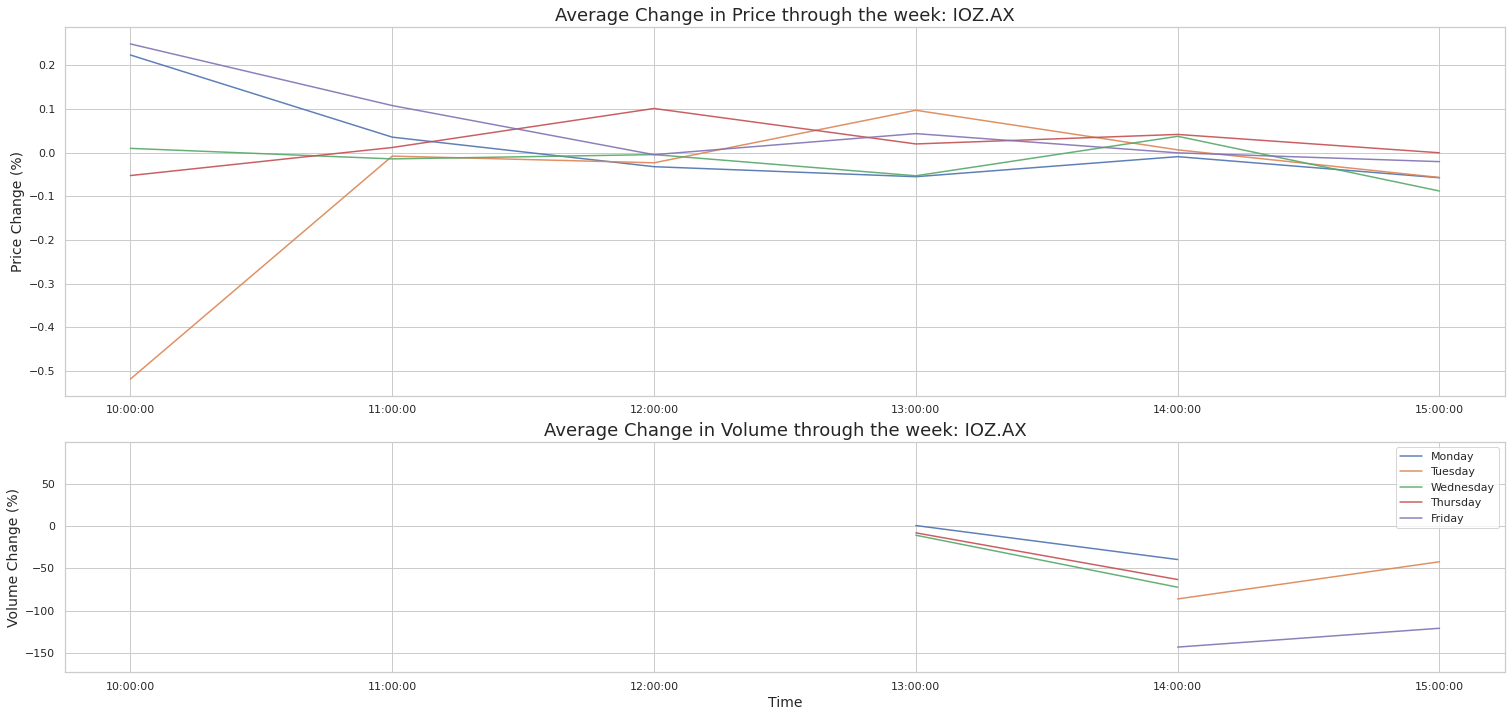

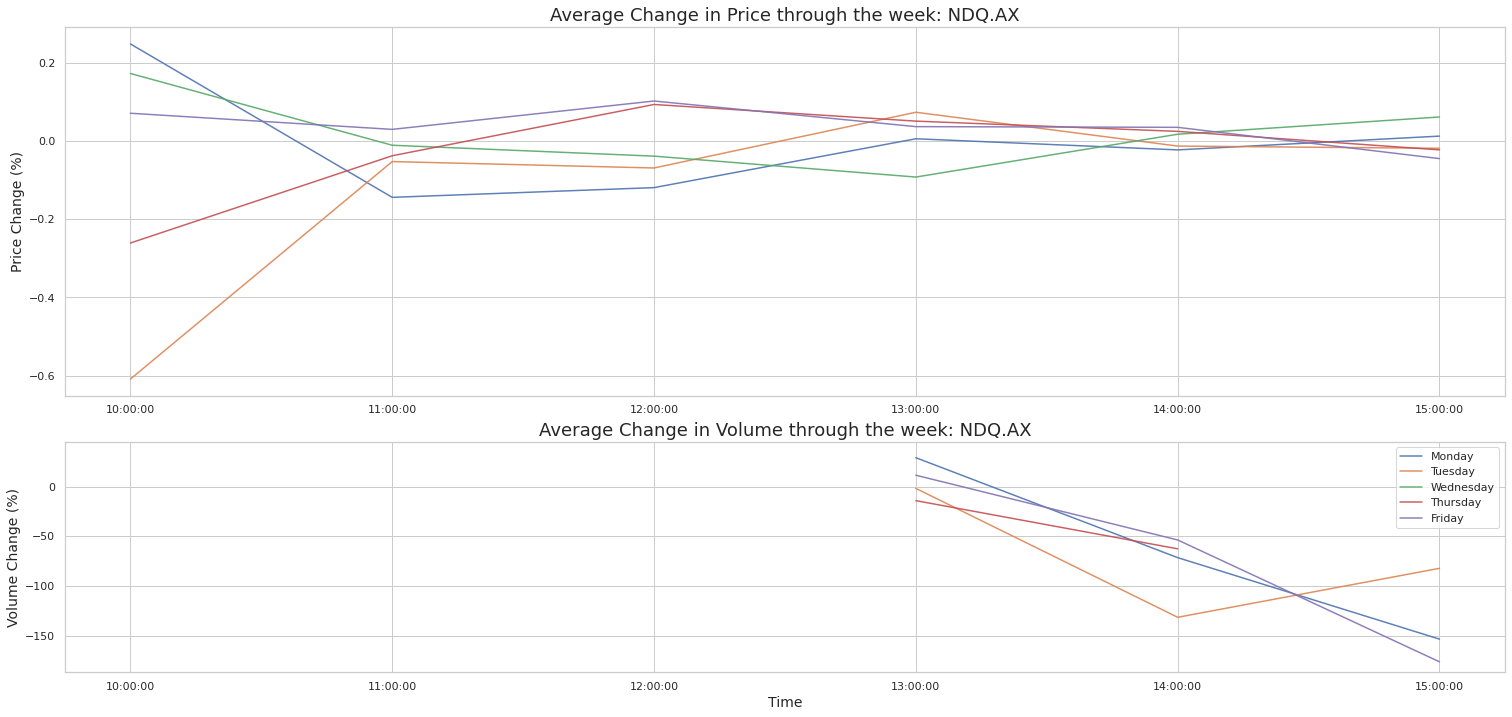

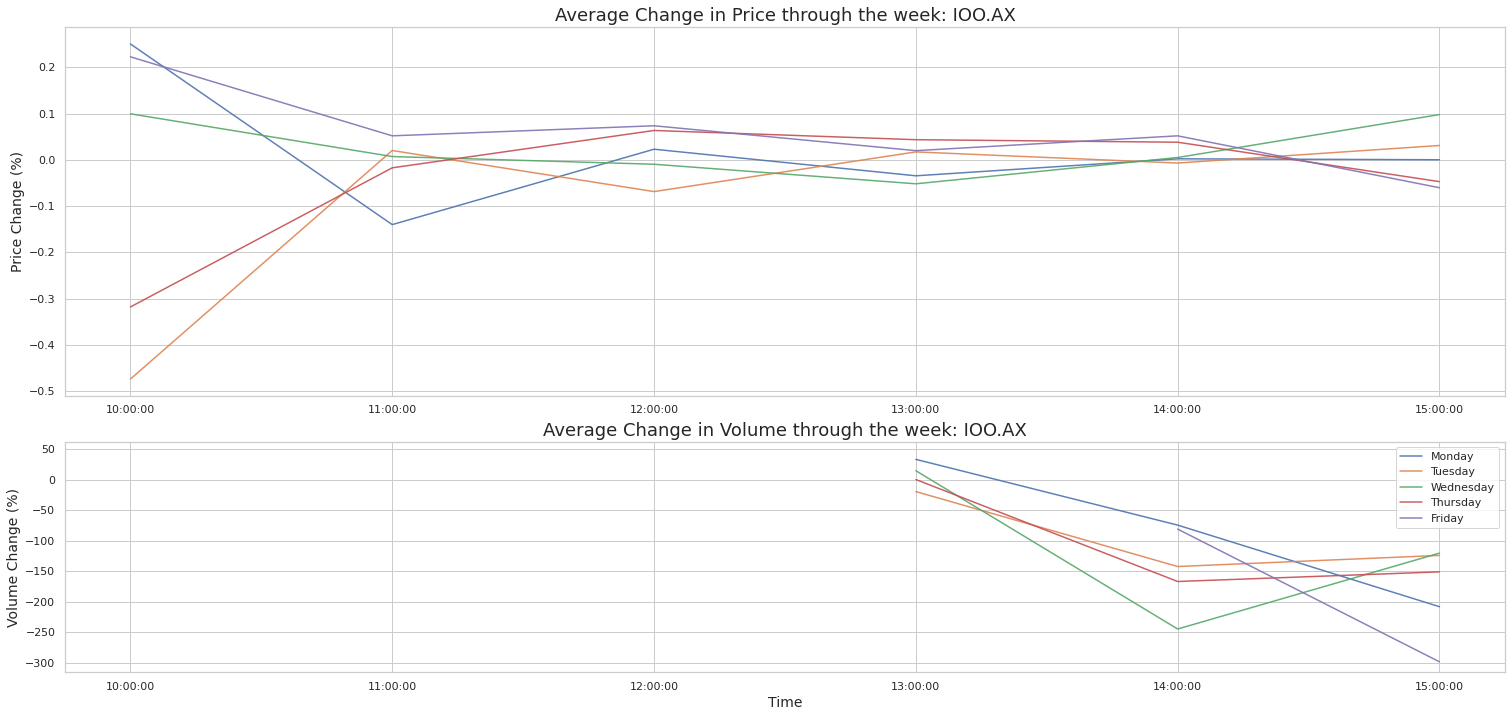

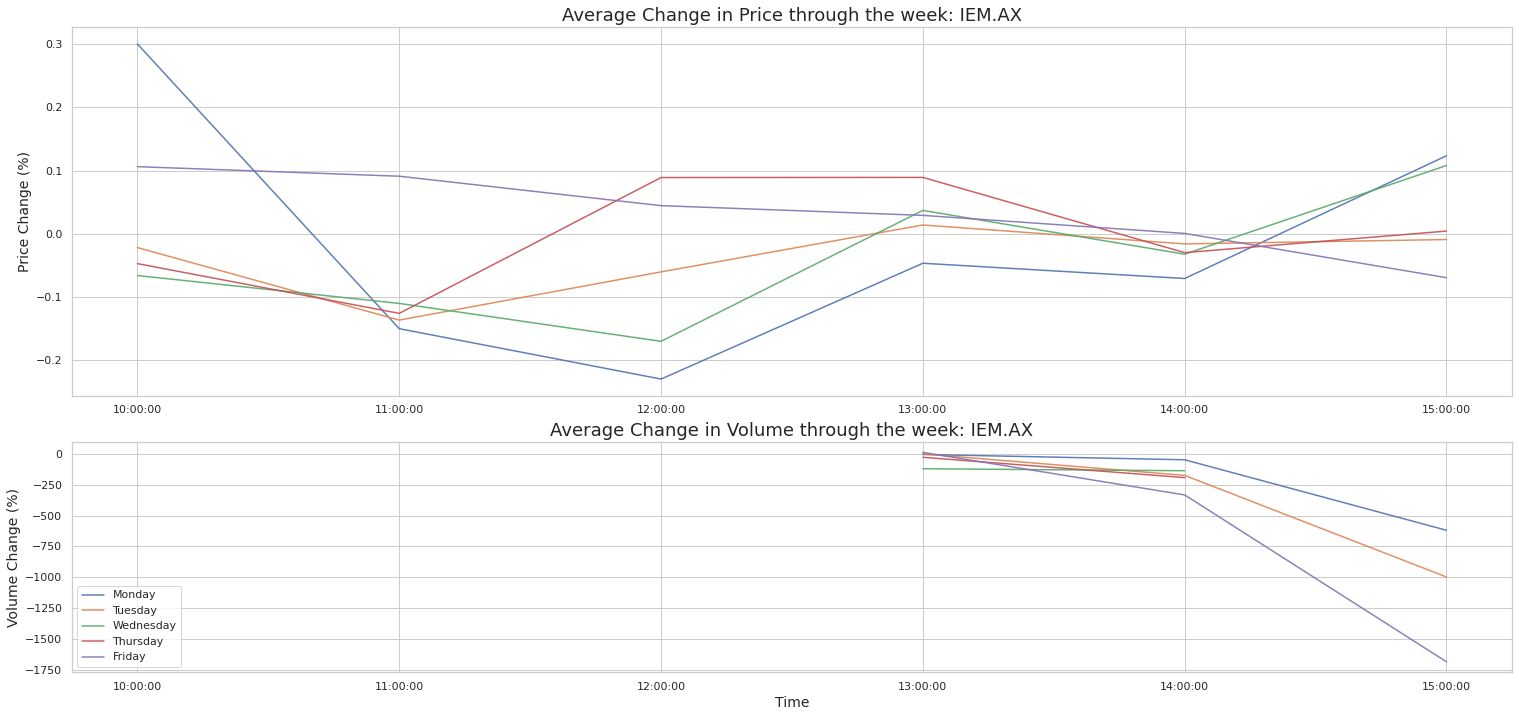

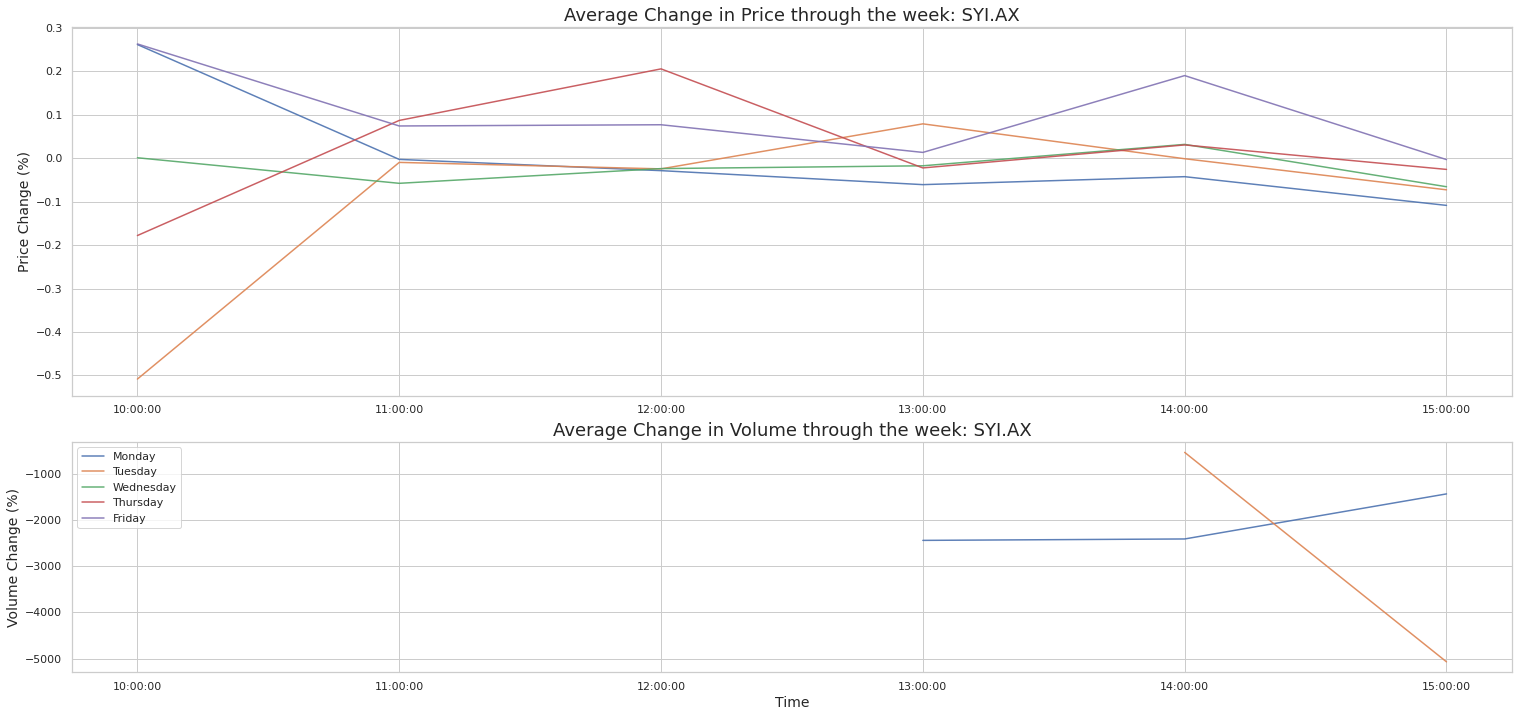

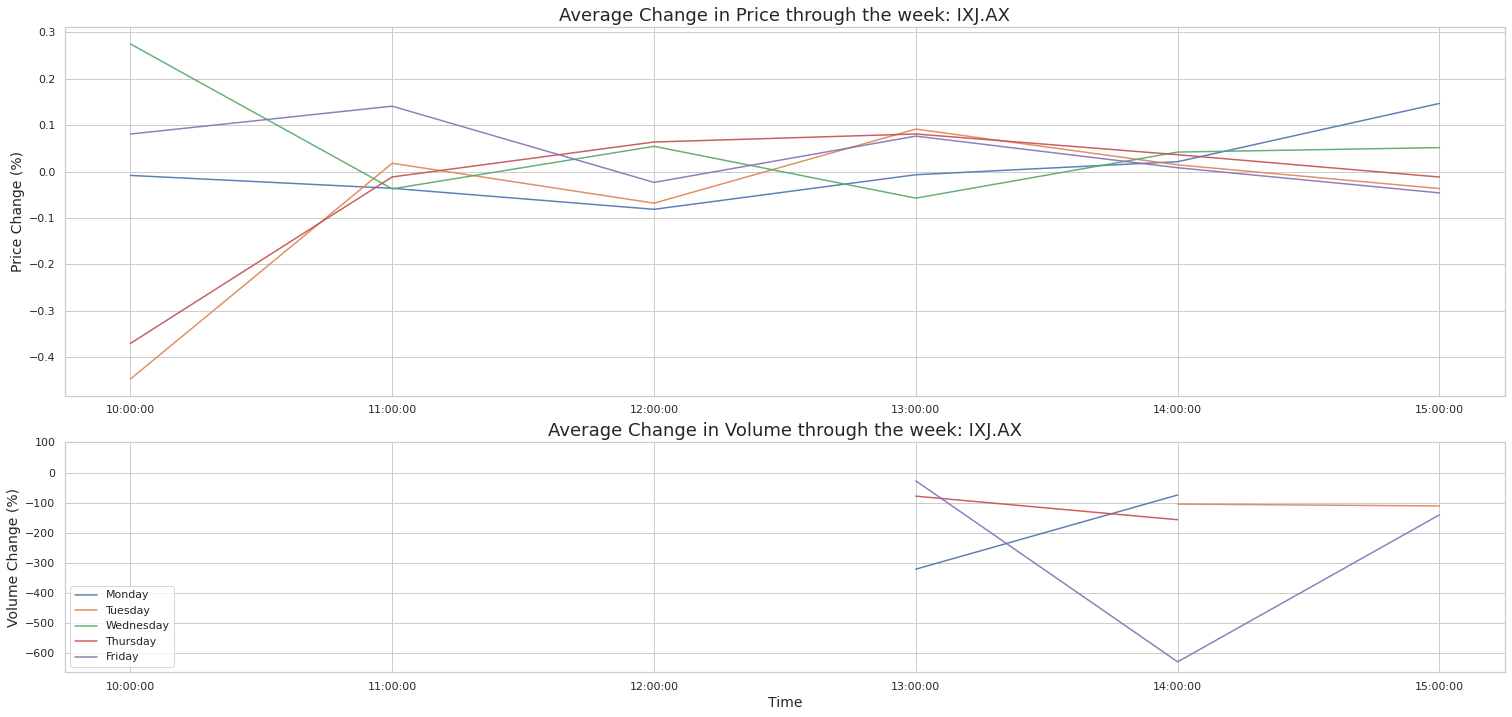

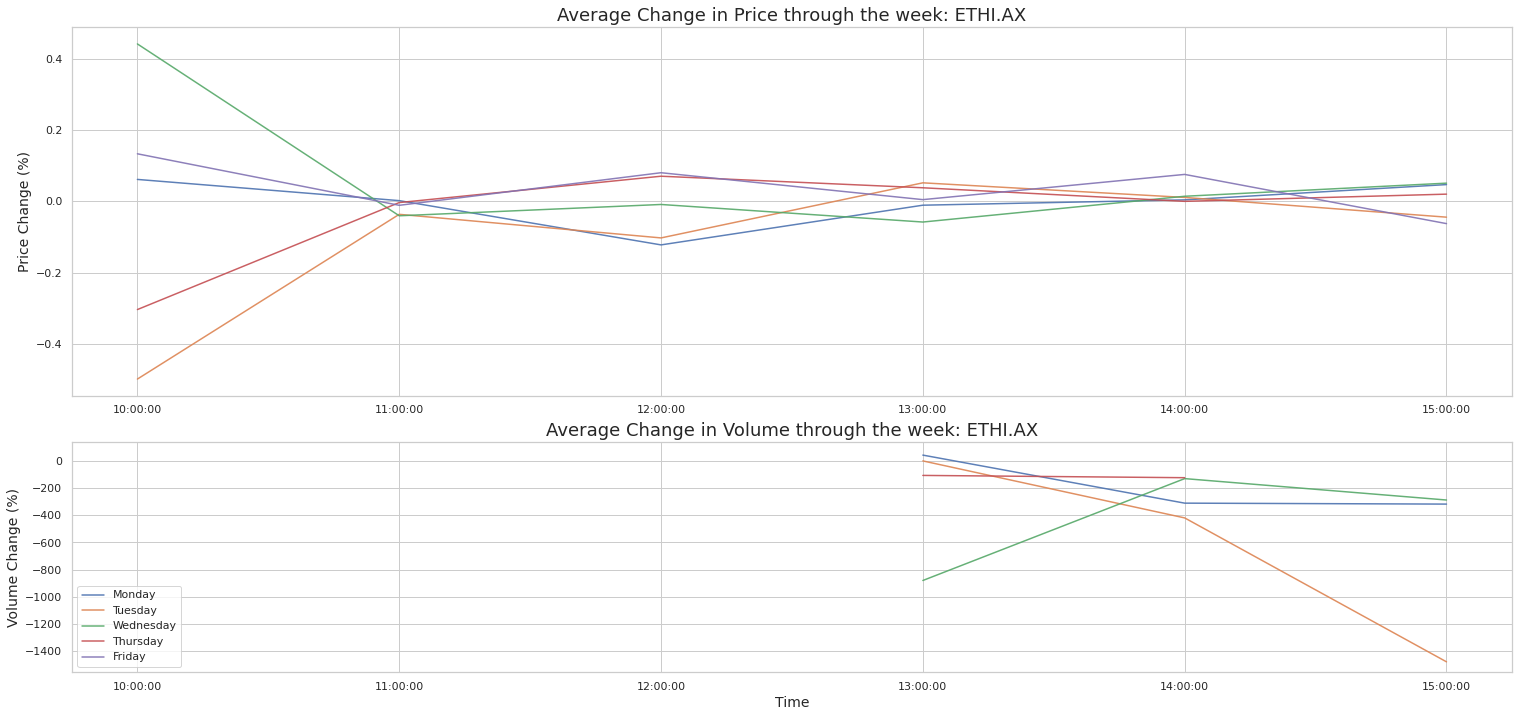

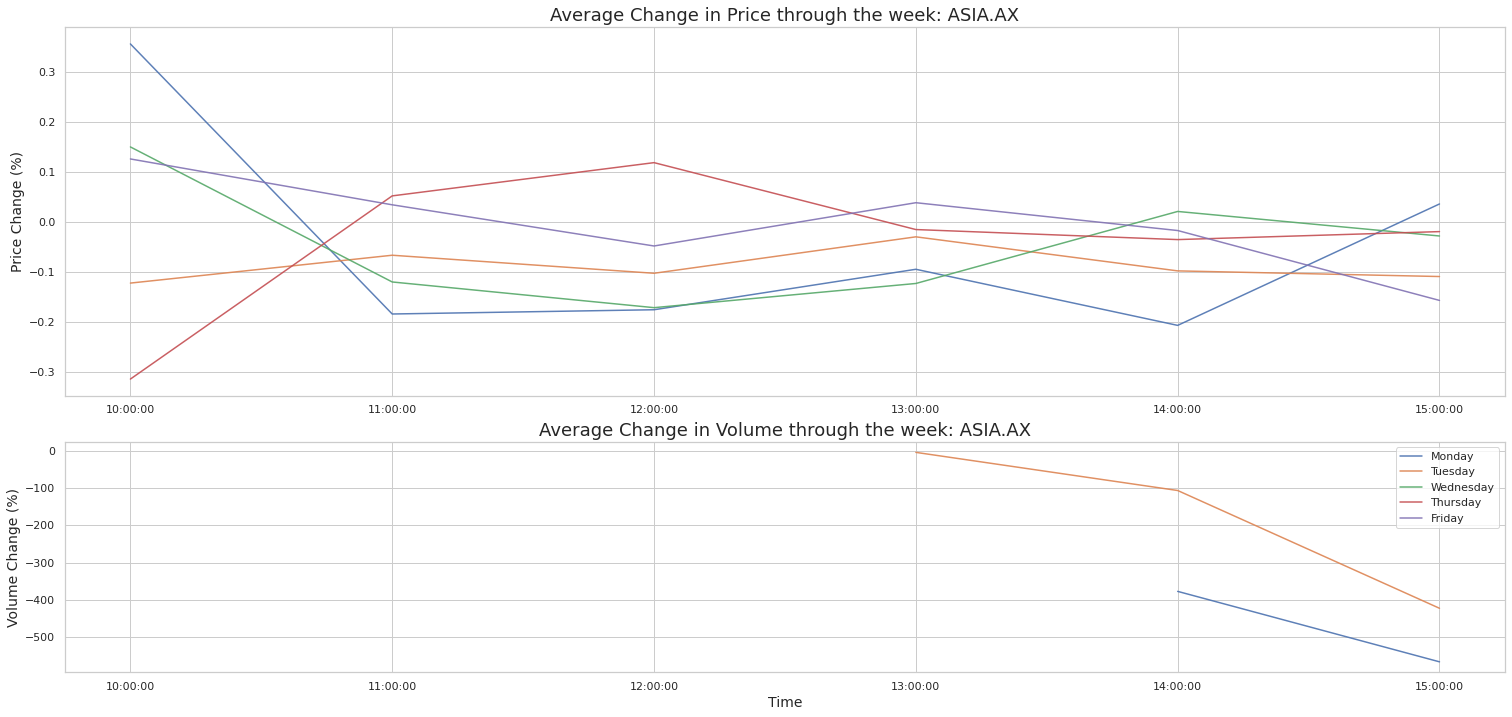

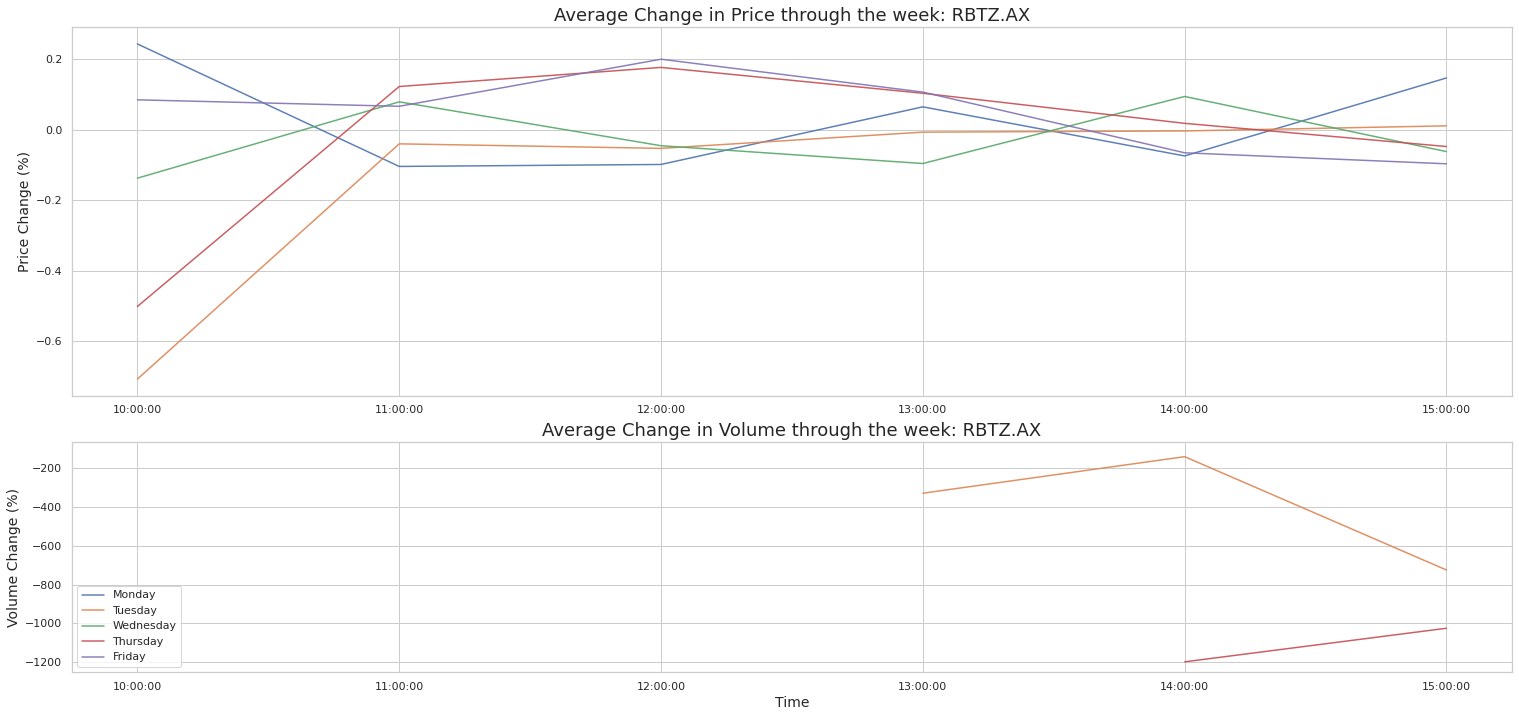

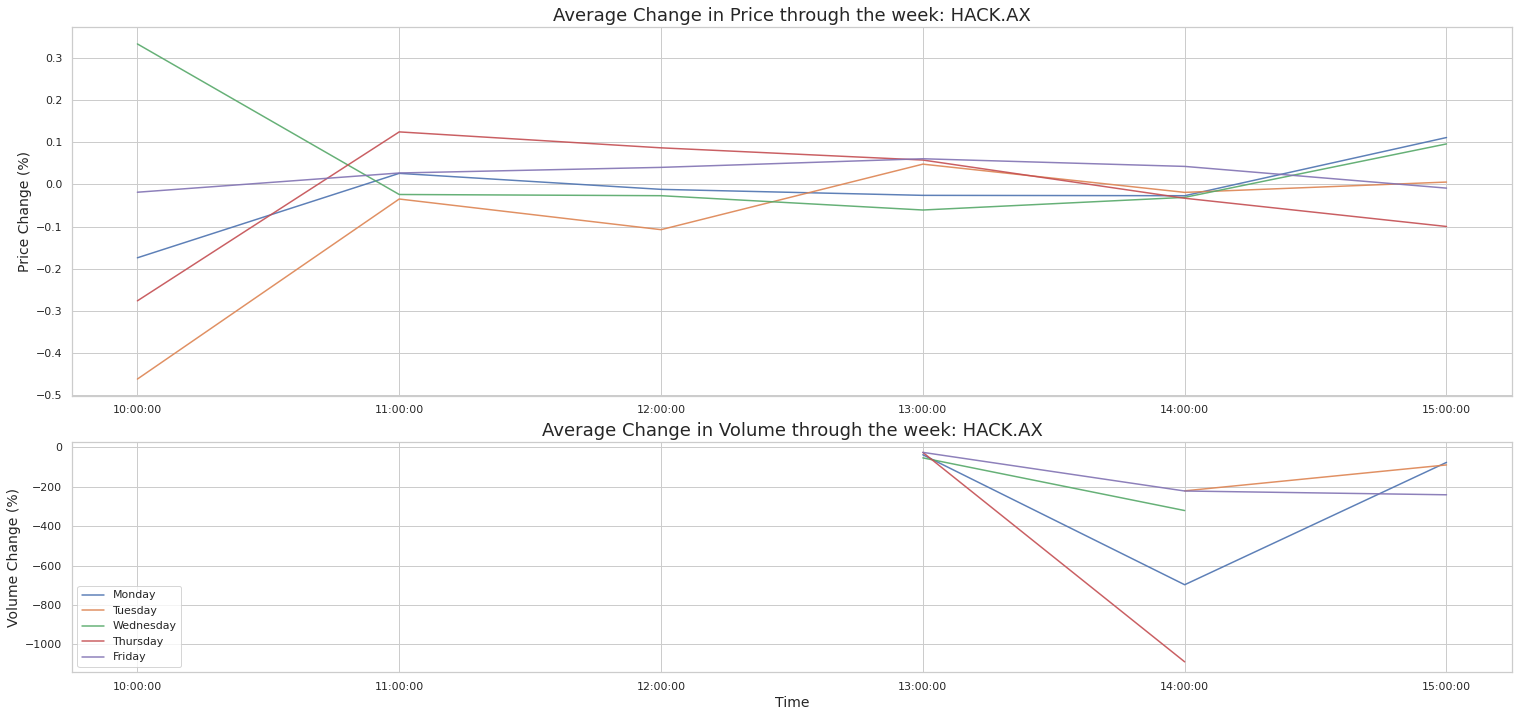

In [ ]:
#hide
pd.options.mode.chained_assignment = None
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

# ticks = [ '^AXJO', '^AORD'] # '^GSPC', '^DJI', '^IXIC',
# ticks = [ 'NDQ.AX','ASIA.AX','ETHI.AX']
# COMMSEC ETF TICKS
ticks = ['IOZ.AX', 'NDQ.AX', 'IOO.AX', 'IEM.AX', 'SYI.AX', 'IXJ.AX','ETHI.AX', 'ASIA.AX', 'RBTZ.AX', 'HACK.AX' ]
# ticks = ['Z1P.AX']
# MAKING DATAFRAME


yf.pdr_override() 

for tick in ticks: 
  data = pdr.get_data_yahoo(tick, interval = '60m', period = "1y")
  plot(data, tick)




In [ ]:
#hide
# ticks = [ '^GSPC', '^DJI', '^IXIC', '^AXJO']
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization 
ticks = [ 'NDQ.AX','ASIA.AX','BTC-USD','ETH-USD','ADA-USD']
# COMMSEC ETF TICKS
# ticks = ['IOZ.AX', 'NDQ.AX', 'IOO.AX', 'IEM.AX', 'SYI.AX', 'IXJ.AX','ETHI.AX', 'ASIA.AX', 'RBTZ.AX', 'HACK.AX' ]
# ticks = ['Z1P.AX']
# MAKING DATAFRAME
yf.pdr_override() 
data = pd.DataFrame()
for tickax in ticks: 
  data[f'{tickax}_CLOSEPRICE'] = pdr.get_data_yahoo(tickax, interval = '1d', period = "2y")['Close']

data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,NDQ.AX_CLOSEPRICE,ASIA.AX_CLOSEPRICE,BTC-USD_CLOSEPRICE,ETH-USD_CLOSEPRICE,ADA-USD_CLOSEPRICE
Date,,,,,
2019-02-05,16.530001,5.63,3466.357422,107.443520,0.037896
2019-02-06,16.969999,5.81,3413.767822,104.919289,0.036663
2019-02-07,17.000000,5.79,3399.471680,104.535301,0.036396
2019-02-08,16.790001,5.67,3666.780273,119.267746,0.040751
2019-02-11,16.830000,5.72,3648.430664,121.298393,0.041733
...,...,...,...,...,...
2021-02-01,28.059999,12.82,33537.175781,1369.040527,0.402033
2021-02-02,28.940001,13.37,35510.289062,1515.193726,0.426247
2021-02-03,29.379999,13.56,37472.089844,1660.909546,0.441400


In [9]:
#hide
df = data

In [ ]:
#hide
x = 0.4037  
y = 0.4788   
z = 0.0354
n = 0.005495
m = 0.06481

ndq = (100*x)/df['NDQ.AX_CLOSEPRICE'].head(1)[0]
asia = (100*y)/df['ASIA.AX_CLOSEPRICE'].head(1)[0]
btc = (100*z)/df['BTC-USD_CLOSEPRICE'].head(1)[0]
eth = (100*n)/df['ETH-USD_CLOSEPRICE'].head(1)[0]
ada = (100*m)/df['ADA-USD_CLOSEPRICE'].head(1)[0]

inital_price = df['NDQ.AX_CLOSEPRICE'].head(1)[0]*ndq + df['ASIA.AX_CLOSEPRICE'].head(1)[0]*asia + \
            df['BTC-USD_CLOSEPRICE'].head(1)[0]*btc + df['ETH-USD_CLOSEPRICE'].head(1)[0]*eth + df['ADA-USD_CLOSEPRICE'].head(1)[0]*ada

final_price = df['NDQ.AX_CLOSEPRICE'].tail(1)[0]*ndq + df['ASIA.AX_CLOSEPRICE'].tail(1)[0]*asia + \
  df['BTC-USD_CLOSEPRICE'].tail(1)[0]*btc + df['ETH-USD_CLOSEPRICE'].tail(1)[0]*eth + df['ADA-USD_CLOSEPRICE'].tail(1)[0]*ada

print(final_price)
print(inital_price)
# df[f'PORTFOLIO_NDQ{x}_ASIA{y}_BTC{z}_ETH{n}_ADA{m}'] = (100*x)/df['NDQ.AX_CLOSEPRICE'] + (100*y)/df['ASIA.AX_CLOSEPRICE']  + \
#                                           (100*z)/df['BTC-USD_CLOSEPRICE'] + (100*n)/df['ETH-USD_CLOSEPRICE'] + (100*m)/df['ADA-USD_CLOSEPRICE']

# df[f'PORTFOLIO_NDQ{x}_ASIA{y}_BTC{z}_ETH{n}_ADA{m}'].tail(1)-df[f'PORTFOLIO_NDQ{x}_ASIA{y}_BTC{z}_ETH{n}_ADA{m}'].head(1)

# ((df[f'PORTFOLIO_NDQ{x}_ASIA{y}_BTC{z}_ETH{n}_ADA{m}'].tail(1)[0]-df[f'PORTFOLIO_NDQ{x}_ASIA{y}_BTC{z}_ETH{n}_ADA{m}'].head(1)[0]) / \
#           df[f'PORTFOLIO_NDQ{x}_ASIA{y}_BTC{z}_ETH{n}_ADA{m}'].head(1)[0])*100

318.7410069240793
98.8205


In [ ]:
#hide


# x = 0.45
# y = 0.45
# z = 0.45
# n = 0.45
# m = 0.45

# df[f'PORTFOLIO_NDQ{x}_ASIA{y}_BTC{z}_ETH{n}_ADA{m}'] = df['NDQ.AX_CLOSEPRICE'] + df['ASIA.AX_CLOSEPRICE']  + \
#                                          df['BTC-USD_CLOSEPRICE'] + df['ETH-USD_CLOSEPRICE'] + df['ADA-USD_CLOSEPRICE']

# df

pbounds = {'x': (0.35,0.7), 'y': (0.35,0.7), 
          'z': (0,0.01), 'n': (0,0.02), 'm': (0,0.01)} 

def score(x,y,z,n,m):
  df = data
  percentage_increase = 0 

  if (0.99 < x+y+z+n+m <= 1):
    ndq = (100*x)/df['NDQ.AX_CLOSEPRICE'].head(1)[0]
    asia = (100*y)/df['ASIA.AX_CLOSEPRICE'].head(1)[0]
    btc = (100*z)/df['BTC-USD_CLOSEPRICE'].head(1)[0]
    eth = (100*n)/df['ETH-USD_CLOSEPRICE'].head(1)[0]
    ada = (100*m)/df['ADA-USD_CLOSEPRICE'].head(1)[0]

    inital_price = df['NDQ.AX_CLOSEPRICE'].head(1)[0]*ndq + df['ASIA.AX_CLOSEPRICE'].head(1)[0]*asia + \
            df['BTC-USD_CLOSEPRICE'].head(1)[0]*btc + df['ETH-USD_CLOSEPRICE'].head(1)[0]*eth + df['ADA-USD_CLOSEPRICE'].head(1)[0]*ada

    final_price = df['NDQ.AX_CLOSEPRICE'].tail(1)[0]*ndq + df['ASIA.AX_CLOSEPRICE'].tail(1)[0]*asia + \
            df['BTC-USD_CLOSEPRICE'].tail(1)[0]*btc + df['ETH-USD_CLOSEPRICE'].tail(1)[0]*eth + df['ADA-USD_CLOSEPRICE'].tail(1)[0]*ada



    percentage_increase = ((final_price - inital_price)/ inital_price)*100

  return percentage_increase


optimizer = BayesianOptimization(
    f=score,
    pbounds=pbounds,
    verbose=1, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1)

optimizer.maximize(
    init_points=20, # n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    n_iter=500) #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.



|   iter    |  target   |     m     |     n     |     x     |     y     |     z     |
-------------------------------------------------------------------------------------
|  73       |  132.2    |  6.445e-0 |  0.0182   |  0.556    |  0.4136   |  0.003005 |
|  95       |  133.3    |  0.001038 |  0.01639  |  0.5554   |  0.4179   |  0.005721 |
|  99       |  135.1    |  0.001625 |  0.01733  |  0.5555   |  0.4194   |  0.005638 |
|  103      |  135.2    |  0.008663 |  0.002671 |  0.3746   |  0.605    |  0.006346 |
|  106      |  135.4    |  0.001343 |  0.01975  |  0.5553   |  0.4185   |  0.002647 |
|  146      |  135.5    |  0.00374  |  0.007516 |  0.3753   |  0.6046   |  0.005588 |
|  153      |  137.3    |  0.009998 |  0.005084 |  0.3745   |  0.6051   |  0.003348 |
|  251      |  137.4    |  0.008967 |  0.006194 |  0.3709   |  0.6087   |  0.002907 |
|  303      |  139.6    |  0.003445 |  0.009203 |  0.3753   |  0.6016   |  0.008218 |
|  340      |  140.9    |  0.0096   |  0.007601 |  0.3